In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Cargarmos datos
X_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='X_train_2004')
X_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_train_2024')
y_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='y_train_2004').iloc[:, 0]
y_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_train_2024').iloc[:, 0]

# Eliminamos columnas 100% vacías
X_train_2024 = X_train_2024.loc[:, X_train_2024.notna().any()]
X_train_2004 = X_train_2004.loc[:, X_train_2004.notna().any()]

# Imputamos valores faltantes con media
imputer = SimpleImputer(strategy='mean')
X_train_2024_imputed = pd.DataFrame(imputer.fit_transform(X_train_2024), columns=X_train_2024.columns)
X_train_2004_imputed = pd.DataFrame(imputer.fit_transform(X_train_2004), columns=X_train_2004.columns)

# Resetear índices
X_train_2004_imputed.reset_index(drop=True, inplace=True)
y_train_2004.reset_index(drop=True, inplace=True)
X_train_2024_imputed.reset_index(drop=True, inplace=True)
y_train_2024.reset_index(drop=True, inplace=True)

# Entrenamos modelos
logit = LogisticRegression(max_iter=2000)
logit.fit(X_train_2024_imputed, y_train_2024)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2004_imputed, y_train_2004)

# Predecimos
y_pred_logit_2024 = logit.predict(X_train_2024_imputed)
y_pred_knn_2004 = knn.predict(X_train_2004_imputed)

# Calculamos accuracy
acc_logit = accuracy_score(y_train_2024, y_pred_logit_2024)
acc_knn = accuracy_score(y_train_2004, y_pred_knn_2004)

# Obtenemos reportes completos
report_logit = classification_report(y_train_2024, y_pred_logit_2024, output_dict=True)
report_knn = classification_report(y_train_2004, y_pred_knn_2004, output_dict=True)

# Creamos DataFrames resumen
df_logit = pd.DataFrame(report_logit).transpose()
df_knn = pd.DataFrame(report_knn).transpose()

# Mostramos solo accuracy global en DataFrame separado
accuracy_summary = pd.DataFrame({
    'Modelo': ['Regresión Logística (2024)', 'KNN k=5 (2004)'],
    'Accuracy': [acc_logit, acc_knn]
})

print("Accuracy global de cada modelo:")
print(accuracy_summary)
print("\nReporte de clasificación Regresión Logística (2024):")
print(df_logit)
print("\nReporte de clasificación KNN (2004):")
print(df_knn)


L:\facultad\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy global de cada modelo:
                       Modelo  Accuracy
0  Regresión Logística (2024)  0.964576
1              KNN k=5 (2004)  0.939078

Reporte de clasificación Regresión Logística (2024):
              precision    recall  f1-score      support
0              0.965297  0.999202  0.981957  8769.000000
1              0.461538  0.018692  0.035928   321.000000
accuracy       0.964576  0.964576  0.964576     0.964576
macro avg      0.713418  0.508947  0.508942  9090.000000
weighted avg   0.947507  0.964576  0.948549  9090.000000

Reporte de clasificación KNN (2004):
              precision    recall  f1-score       support
0              0.943838  0.993683  0.968119   9657.000000
1              0.705314  0.203626  0.316017    717.000000
accuracy       0.939078  0.939078  0.939078      0.939078
macro avg      0.824576  0.598655  0.642068  10374.000000
weighted avg   0.927352  0.939078  0.923049  10374.000000


### los modelos lograron una alta precisión global, con un accuracy de aproximadamente 96.5% para la regresión logística y 93.9% para KNN, lo que indica que ambos funcionan bien en términos generales. Sin embargo, los datos están claramente desbalanceados, ya que la clase mayoritaria domina la muestra. Esto hace que el accuracy sea una métrica poco representativa para evaluar el desempeño en la clase minoritaria. La regresión logística apenas detecta casos de la clase minoritaria, reflejado en un recall muy bajo para esa clase, mientras que KNN mejora algo la detección pero sigue siendo insuficiente. Ambos modelos muestran buena precisión para la clase mayoritaria, pero no logran capturar bien la clase minoritaria, lo que afecta negativamente las métricas de recall y F1-score para dicha clase. Por ello, sería recomendable emplear técnicas para balancear las clases o ajustar los umbrales de decisión, y considerar métricas que reflejen mejor el desempeño en la clase minoritaria.

L:\facultad\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Matriz de Confusión Regresión Logística (2024):
[[3762    3]
 [ 129    3]]
Accuracy Regresión Logística (2024): 0.9661
AUC Regresión Logística (2024): 0.8435

Matriz de Confusión KNN k=5 (2004):
[[4077   52]
 [ 294   24]]
Accuracy KNN k=5 (2004): 0.9222
AUC KNN k=5 (2004): 0.7287


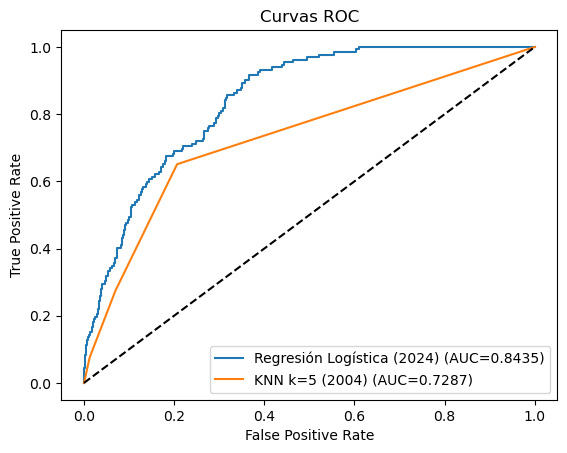

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Cargarmos los datos train (para entrenar) 
X_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='X_train_2004')
y_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='y_train_2004').iloc[:, 0]

X_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_train_2024')
y_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_train_2024').iloc[:, 0]

# Cargarmos los datos test 
X_test_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='X_test_2004')
y_test_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='y_test_2004').iloc[:, 0]

X_test_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_test_2024')
y_test_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_test_2024').iloc[:, 0]

# Eliminamos columnas vacías 
X_train_2024 = X_train_2024.loc[:, X_train_2024.notna().any()]
X_train_2004 = X_train_2004.loc[:, X_train_2004.notna().any()]
X_test_2024 = X_test_2024[X_train_2024.columns]  # asegurar mismas columnas que train
X_test_2004 = X_test_2004[X_train_2004.columns]

# Imputamos valores faltantes
imputer_2024 = SimpleImputer(strategy='mean')
X_train_2024_imputed = pd.DataFrame(imputer_2024.fit_transform(X_train_2024), columns=X_train_2024.columns)
X_test_2024_imputed = pd.DataFrame(imputer_2024.transform(X_test_2024), columns=X_train_2024.columns)

imputer_2004 = SimpleImputer(strategy='mean')
X_train_2004_imputed = pd.DataFrame(imputer_2004.fit_transform(X_train_2004), columns=X_train_2004.columns)
X_test_2004_imputed = pd.DataFrame(imputer_2004.transform(X_test_2004), columns=X_train_2004.columns)

# Entrenamos modelos ---
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_2024_imputed, y_train_2024)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2004_imputed, y_train_2004)

# Predecimos lax probabilidades ---
probs_logit_2024 = logit.predict_proba(X_test_2024_imputed)[:, 1]
probs_knn_2004 = knn.predict_proba(X_test_2004_imputed)[:, 1]

# Predicciones con umbral 0.5 
y_pred_logit_2024 = (probs_logit_2024 > 0.5).astype(int)
y_pred_knn_2004 = (probs_knn_2004 > 0.5).astype(int)

# Métricas 
def print_metrics(y_true, y_pred, probs, modelo):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, probs)

    print(f"\nMatriz de Confusión {modelo}:")
    print(cm)
    print(f"Accuracy {modelo}: {acc:.4f}")
    print(f"AUC {modelo}: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_true, probs)
    plt.plot(fpr, tpr, label=f'{modelo} (AUC={auc:.4f})')

# Mostramos resultados 
print_metrics(y_test_2024, y_pred_logit_2024, probs_logit_2024, "Regresión Logística (2024)")
print_metrics(y_test_2004, y_pred_knn_2004, probs_knn_2004, "KNN k=5 (2004)")

# Graficamos curvas ROC 
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()


### En conclusión, si se prioriza la precisión global y una buena separación entre clases, el modelo de regresión logística para el año 2024 es el más adecuado. En cambio, si el objetivo es identificar la mayor cantidad posible de casos positivos incluso aceptando un mayor número de errores, el modelo KNN para el año 2004 muestra mejor desempeño en este aspecto. La elección final del modelo más apropiado dependerá, por lo tanto, de los objetivos específicos del análisis y del costo relativo de los diferentes tipos de error.

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Cargarmos datos de entrenamiento (2024) 
X_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_train_2024')
y_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_train_2024').iloc[:, 0]

# Cargarmos datos de no respondientes ---
X_norsp_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_test_2024')
y_norsp_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_test_2024').iloc[:, 0]  # si querés comparar después

# Aseguraramos mismas columnas y limpiar
X_train_2024 = X_train_2024.loc[:, X_train_2024.notna().any()]
X_norsp_2024 = X_norsp_2024[X_train_2024.columns]

# imputamos
imputer = SimpleImputer(strategy='mean')
X_train_2024_imputed = pd.DataFrame(imputer.fit_transform(X_train_2024), columns=X_train_2024.columns)
X_norsp_2024_imputed = pd.DataFrame(imputer.transform(X_norsp_2024), columns=X_train_2024.columns)

# Entrenamos modelos
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_2024_imputed, y_train_2024)

# predecimos
y_pred_norsp = logit.predict(X_norsp_2024_imputed)

# Calculamos la proporción de desocupados ---
num_desocupados = (y_pred_norsp == 1).sum()
total_norsp = len(y_pred_norsp)
proporcion_desocupados = num_desocupados / total_norsp

# Mostramos resultados
print(f"Número de personas clasificadas como desocupadas: {num_desocupados}")
print(f"Total de personas que no respondieron: {total_norsp}")
print(f"Proporción estimada de desocupados entre no respondientes: {proporcion_desocupados:.4f}")


Número de personas clasificadas como desocupadas: 6
Total de personas que no respondieron: 3897
Proporción estimada de desocupados entre no respondientes: 0.0015


L:\facultad\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Utilizamos el modelo de regresión logística con los datos del año 2024, se realizó la predicción sobre la base de personas que no respondieron. De un total de 3897 individuos, el modelo identificó 6 personas como desocupadas. Esto representa una proporción estimada de desocupados del 0.15% entre los no respondientes. Este bajo porcentaje sugiere que, según el modelo, la mayoría de los no respondientes probablemente no se encuentran en situación de desocupación.
